# MACHINE LEARNING: GRADIENT DESCENT IMPLEMENTATION

This notebook let us implement gradient descent algorithm from scratch. I want to express gratitude to [this notebook](https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c) for providing the open source code for implementation. If interested, feel free to check out the above github for more illustration.

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

### Create Data

Data gen:
$$\theta_0 = 4, \theta_1 = 3$$

add noise, as well as generate $x$ and $y$

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y ~ linear model 

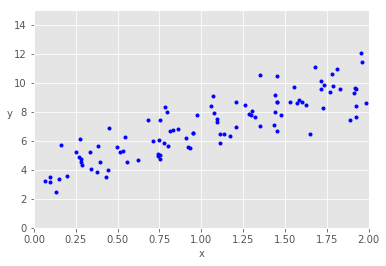

In [4]:
# visualization
plt.plot(X, y, 'b.')
plt.xlabel("x", fontsize = 10)
plt.ylabel("y", fontsize = 10, rotation = 0)
_ =plt.axis([0, 2, 0, 15])

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 3.60541117]
 [ 3.27067296]]


### Gradient Descent

Cost:
$$J(\theta) = 1/2 \sum_{i=1}^m (h(\theta)_{(i)} - y_{(i)})^2$$

Compute gradient:
$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} \sum_i (h(\theta) - y) \cdot X_j$$

next, we update our parameters $\theta_0$, $\theta_1$, etc..

In [6]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2 * m) * np.sum(np.square(predictions - y))
    return cost

In [9]:
def gradient_descent(X, y, theta, learning_rate = 0.01, iterations = 100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    # update
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it, :] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
        
    return theta, cost_history, theta_history

In [13]:
# training in progress
lr = 0.01
n_iter = 3000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
theta, cost_history, theta_history = gradient_descent(X_b, y, theta, lr, n_iter)

# output disply
print('Theta0: {:0.3f}, \nTheta1: {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost: {:0.3f}'.format(cost_history[-1]))

Theta0: 3.612, 
Theta1: 3.265
Final cost: 5657.080


### Performance Visualization

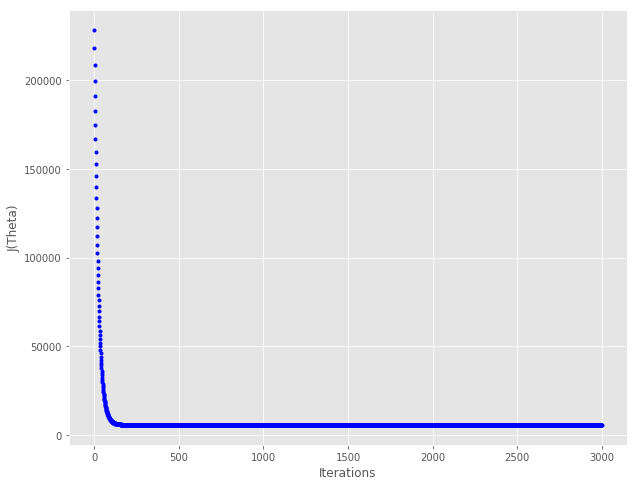

In [14]:
# plot performance
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_ =ax.plot(range(n_iter), cost_history, 'b.')

Investigation ends here.